# Computational Physics
## Spectral Analysis

<img src="https://upload.wikimedia.org/wikipedia/commons/e/ea/From_Continuous_To_Discrete_Fourier_Transform.gif" width=600px>

If you are not familiar with Fourier analysis, I strongly reccomend the following video: https://www.youtube.com/watch?v=spUNpyF58BY

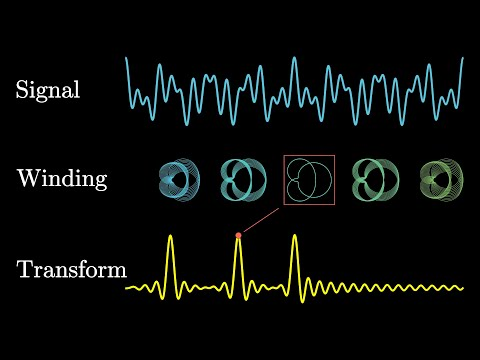

In [1]:
import style
style._set_css_style('../include/bootstrap.css')

from IPython.display import YouTubeVideo
YouTubeVideo('spUNpyF58BY')

## Last Time

### [Notebook Link: 20 Least Squares](./20_LeastSquares.ipynb)

- Non-linear fitting
- Goodness of fit and $\chi^2$


## Today

- Spectral analysis
- Discrete Fourier transform

## Setting up the Notebook

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('../include/notebook.mplstyle');
%config InlineBackend.figure_format = 'svg'
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

## Spectral Analysis

There are entire courses taught on this subject (EE 171) where it is often referred to as *signal processing*.  We will learn how to extract information about the predictable or repeating parts of signals.

For a continous function $y(t)$, this is achieved by taking the Fourier transform:

\begin{equation}
\hat{y}(\omega) = \int_{-\infty}^{\infty} dt y(t) \mathrm{e}^{-i \omega t}.
\end{equation}

What do we do when we have discrete data sets?

### Discrete Fourier Transform

Consider a vector of $N$ data points $\vec{y} = (y_0,\ldots,y_{N-1})$.  This will often be a *time series*, the value of a function over a long period of time.  We assume that the measurements $y_j$ are made at equally spaced intervals where $t_j = j \Delta t$ with $j \in \mathbb{Z}$. 

In order to search for any repeating patterns in $\vec{y}$ we can represent construct a continuous represenation $y(t)$ using the *Dirac comb*:

\begin{equation}
y(t) = \sum_{j=0}^{N-1} y_j \delta(t - j\Delta t)
\end{equation}

then using our definition for the continuous Fourier transform:

\begin{align}
\hat{y}(\omega) &= \int_{-\infty}^{\infty} dt y(t) \mathrm{e}^{-i \omega j\Delta t} \newline
&= \sum_{j=0}^{N-1} y_j \mathrm{e}^{-i \omega t} .
\end{align}

However, unlike the continous case, our signal has a finite range, $T$.  We can extend it by enforcing that $y(t+T) = y(t)$, i.e. we have a time-translational symmetry by $T$. This implies $y_j = y_{j+N}$ and

\begin{align}
\sum_{j=0}^{N-1} y_j \mathrm{e}^{-i \omega j \Delta t}  &= \sum_{j=0}^{N-1} y_{j+N} \mathrm{e}^{-i \omega (j+N)\Delta t} \newline
&= \sum_{j=0}^{N-1} y_{j} \mathrm{e}^{-i \omega j\Delta t} \mathrm{e}^{-i \omega T}
\end{align}

which is only possible if:

\begin{equation}
\mathrm{e}^{-i \omega T} = 1 \Leftrightarrow \omega = \omega_k =  \frac{2\pi}{N\Delta t} k \text{ where } k \in \mathbb{Z}.
\end{equation}

1. The smallest non-zero frequency is: $$\omega_1 = \frac{2\pi}{N\Delta t}.$$  We need lots of data at long times to investigate small frequencies.
2. The largest frequency we can study is $$\omega_{N-1} = \frac{2\pi(N-1)}{N\Delta t} \approx \frac{2\pi}{\Delta t}.$$  To study high frequency behavior we need a small time step $\Delta t \ll 1$.

We can now write the discrete Fourier transform of $y$ as:

\begin{align}
\hat{y}_k & = \sum_{j=0}^{N-1} y_j \mathrm{e}^{-i \omega_k j \Delta t} \newline
& = \sum_{j=0}^{N-1} y_j \mathrm{e}^{-i 2\pi k j /N} .
\end{align}

Note:
\begin{equation}
\hat{y}_{k+N} = \sum_{j=0}^{N-1} y_j \mathrm{e}^{-i 2\pi (k+N) j /N} = \sum_{j=0}^{N-1} y_j \mathrm{e}^{-i 2\pi j k/N}\mathrm{e}^{-i 2\pi j}= \hat{y}_k.
\end{equation}
There are only $N$ values of $k$.

### Inverse Fourier Transform

To reconstruct our original data set, we multiply both sides by $\mathrm{e}^{i 2\pi n k/N}$ and sum over $k$:

\begin{align}
\sum_{k=0}^{N-1} \hat{y}_k \mathrm{e}^{i 2\pi n k/N} & = \sum_{k=0}^{N-1}\mathrm{e}^{i 2\pi n k/N} \sum_{j=0}^{N-1} y_j \mathrm{e}^{-i 2\pi k j /N} \newline
 &= \sum_{j=0}^{N-1} y_j \sum_{k=0}^{N-1} \mathrm{e}^{-i 2\pi k(j-n)/N}
\end{align}

and we recognize the definition of the Kronecker $\delta$-function:
\begin{equation}
\sum_{k=0}^{N-1} \mathrm{e}^{-i 2\pi k(j-j')/N} = N \delta_{j,j'}
\end{equation}
such that
\begin{equation}
y_n = \frac{1}{N} \sum_{k=0}^{N-1}\hat{y}_k \mathrm{e}^{i 2\pi n k/N} .
\end{equation}


<div class="span alert alert-success">
<h2> Programming challenge </h2>
Complete the code fragment below to implement the discrete Fourier transform.
</div>

In [3]:
from scipy.constants import pi as π
def fourier_transform(y):
    '''Return the discrete Fourier transform of y.'''
    N = y.size
    ŷ = np.zeros([N],dtype=complex)

    return ŷ

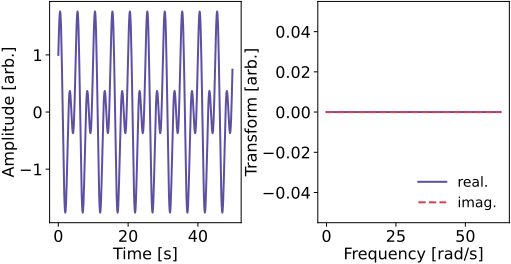

In [4]:
# the time series
Δt = 0.1
t = np.arange(0.0,50.0,Δt)
N = t.size
ωₒ = 2.0*π*(0.2)
ϕ = 0.5*π
y = np.sin(ωₒ*t + ϕ) + np.sin(2*ωₒ*t)

# Plot the time series
fig,ax = plt.subplots(1,2, figsize=(8,4))
fig.subplots_adjust(wspace=0.4)

ax[0].plot(t,y)
ax[0].set_xlabel('Time [s]')
ax[0].set_ylabel('Amplitude [arb.]')

# Get the discrete FT
ω = 2*π*np.arange(0,N)/(N*Δt)
ŷ = fourier_transform(y)

# Plot the real and imaginary parts of the DFT
ax[1].plot(ω,ŷ.real,label='real.', color=colors[0])
ax[1].plot(ω,ŷ.imag,linestyle='--',label='imag.', color=colors[-2])

ax[1].set_xlabel('Frequency [rad/s]')
ax[1].set_ylabel('Transform [arb.]')
ax[1].legend(loc='lower right')

## Power Spectrum

Sometimes we don't want the additional phase information and we only care about the location of the peaks in the spectrum.  It is related to the integrated temporal correlation function of the time series.  For a continuous function:

\begin{equation}
\int_{-\infty}^{\infty} d\tau \left[\int_{-\infty}^{\infty} dt y(t)y^\ast(t+\tau) \right] \mathrm{e}^{i\omega \tau} = \hat{y}(\omega)\hat{y}^\ast(\omega) = |\hat{y}(\omega)|^2
\end{equation}

where we have used the convolution property of the Fourier transform.

We can analze it for our previous time series in the discrete case:

Text(0, 0.5, 'Power [arb]')

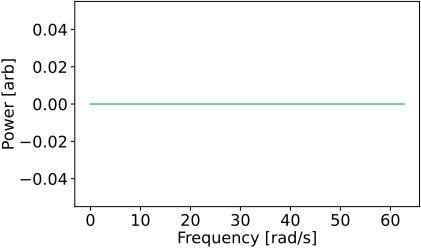

In [5]:
plt.plot(ω,np.abs(ŷ),color=colors[2])
plt.xlabel('Frequency [rad/s]')
plt.ylabel('Power [arb]')

### Let's investigate the power of the Fourier transform on some input data

[Text(0.5, 0, 't'), Text(0.5, 0, 't')]

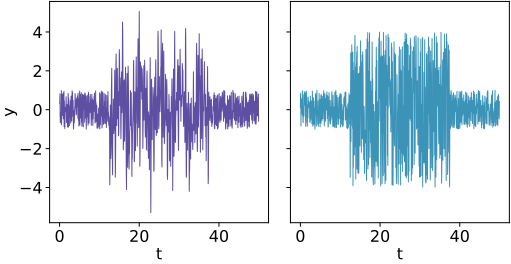

In [6]:
t,*y = np.loadtxt('../data/signal.dat',unpack=True)
fig, axes = plt.subplots(1,2,sharex=True, sharey=True, squeeze=True, figsize=(8,4))
fig.subplots_adjust(wspace=0.1)

for i,ax in enumerate(axes):
    ax.plot(t,y[i],'-',color=colors[i], linewidth=1)

axes[0].set_ylabel('y')
[ax.set_xlabel('t') for ax in axes]

Text(0, 0.5, '|ŷ|')

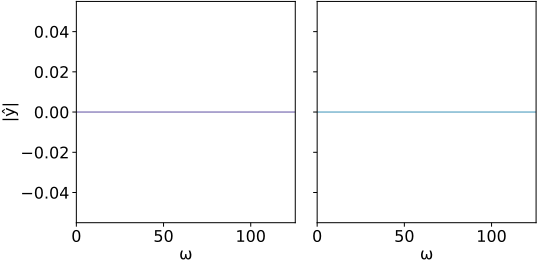

In [7]:
ω = 2*π*np.arange(0,t.size)/(t.size*(t[1]-t[0]))

fig, axes = plt.subplots(1,2,sharex=True, sharey=True, squeeze=True, figsize=(8,4))
fig.subplots_adjust(wspace=0.1)

for i,ax in enumerate(axes):
    ŷ = fourier_transform(y[i])
    ax.plot(ω,np.abs(ŷ),color=colors[i], linewidth=1)
    ax.set_xlabel('ω')
    ax.set_xlim(0,ω[-1])

axes[0].set_ylabel('|ŷ|')

In all these examples, we have identifed some *natural* frequecies in the time series, but there were always two copies.

### What is the origin of the large frequency signals?

For a real signal we have: $y_j = y^\ast_j$.  Consider the complex conjugate of the Fourier tranform $\hat{y}^\ast_k$:

\begin{align}
\hat{y}^\ast_k &= \sum_{j=0}^{N-1} y^\ast_j \mathrm{e}^{i2\pi jk/N} \newline
 &= \sum_{j=0}^{N-1} y_j \mathrm{e}^{-i2\pi j(-k)/N} \times \mathrm{e}^{-i 2\pi j N/N} \newline
 &= \sum_{j=0}^{N-1} y_j \mathrm{e}^{-i2\pi j(N-k)/N}  \newline
 &= \hat{y}_{N-k} .
\end{align}

Thus, the $N$ real data points are used to construct $N/2$ unique *complex* data.  The spectrum is completely described by the first $N/2$ frequencies.  Instead of $2\pi/\Delta t$ the largest frequency we can distinguish is half this value.

### Nyquist Frequency
$$\omega_{\rm Ny} = \frac{\pi}{\Delta t}$$

We can simply truncate our discrete Fourier transform, plotting the meaningful independent components.

Text(0, 0.5, '|ŷ|')

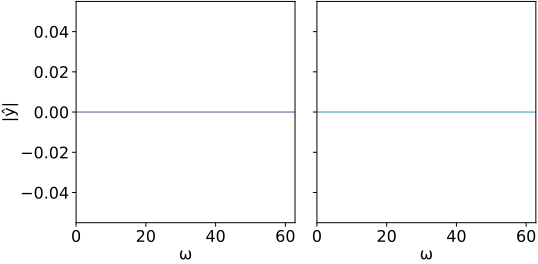

In [8]:
fig, axes = plt.subplots(1,2,sharex=True, sharey=True, squeeze=True, figsize=(8,4))
fig.subplots_adjust(wspace=0.1)

for i,ax in enumerate(axes):
    ŷ = fourier_transform(y[i])
    ax.plot(ω,np.abs(ŷ),color=colors[i], linewidth=1)
    ax.set_xlabel('ω')
    ax.set_xlim(0,0.5*ω[-1])

axes[0].set_ylabel('|ŷ|')

In practice, we want $\omega_{\rm Ny}$ to be considerably larger then any Fourier components that are expected to be present in the signal.

1. In experiments: use a low-pass filter.
2. In simulations, make sure $\Delta t \ll$ any intrinsic time scales.